Dataset Loaded Successfully
      MedInc   HouseAge  AveRooms  AveBedrms   Population  AveOccup  \
0   5.618102  10.441779  4.093645   3.018109  2902.779804  2.968178   
1  14.260715  28.636948  3.975830   3.390044  4046.618414  3.367178   
2  10.979909  45.520238  9.250037   1.751404  3824.788556  5.272737   
3   8.979877  38.343469  3.996370   2.874622   854.109533  2.700022   
4   2.340280  42.134619  4.175598   2.715238   831.322402  5.348248   

    Latitude   Longitude     Price  
0  38.482570 -123.612005  3.359828  
1  33.723864 -122.132275  5.962390  
2  40.723946 -115.687542  2.341541  
3  38.131162 -116.332316  2.214097  
4  33.572039 -120.493573 -2.078642  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      1000 non-null   float64
 1   HouseAge    1000 non-null   float64
 2   AveRooms    1000 non-null  

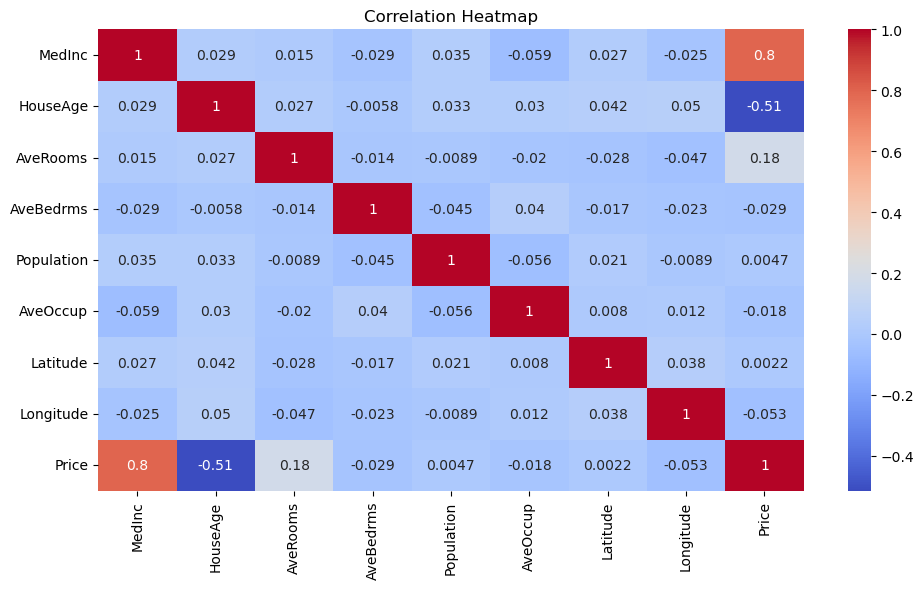

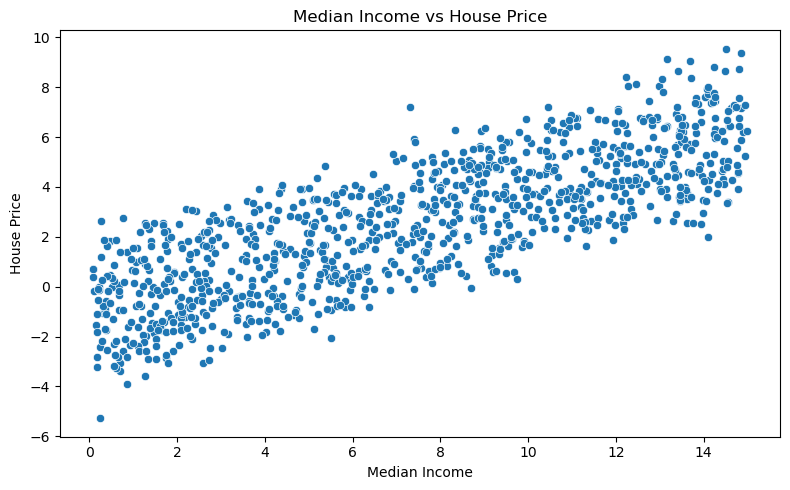


Training set size: 800 samples
Testing set size: 200 samples

Training linear regression model...

Model Coefficients:
MedInc: 0.4943
HouseAge: -0.0983
AveRooms: 0.1999
AveBedrms: -0.0070
Population: -0.0000
AveOccup: 0.0844
Latitude: 0.0040
Longitude: -0.0017
Intercept: -0.2668

Model Evaluation:
MAE: 0.4404
RMSE: 0.5495
R²: 0.9587

Model saved successfully as 'house_price_model.pkl'

Sample Input:
       MedInc   HouseAge  AveRooms  AveBedrms   Population  AveOccup  \
521  5.713363  48.656237  3.075481   2.407322  2927.873704  3.886767   

      Latitude   Longitude  
521  34.117981 -118.941908  
Actual Price: -0.7266
Predicted Price: -0.9876


In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
#Create Sample Dataset
'''
np.random.seed(42)
n_samples = 1000
data = {
    'MedInc': np.random.uniform(0, 15, n_samples),
    'HouseAge': np.random.uniform(1, 52, n_samples),
    'AveRooms': np.random.uniform(2, 10, n_samples),
    'AveBedrms': np.random.uniform(1, 4, n_samples),
    'Population': np.random.uniform(100, 5000, n_samples),
    'AveOccup': np.random.uniform(1, 6, n_samples),
    'Latitude': np.random.uniform(32, 42, n_samples),
    'Longitude': np.random.uniform(-124, -114, n_samples),
}

data['Price'] = (
    0.5 * data['MedInc'] + 
    0.2 * data['AveRooms'] - 
    0.1 * data['HouseAge'] + 
    0.1 * data['AveOccup'] + 
    np.random.normal(0, 0.5, n_samples)
)

df = pd.DataFrame(data)
df.to_csv('california_housing.csv', index=False)
'''
#Load Dataset
df = pd.read_csv("california_housing.csv")
print("Dataset Loaded Successfully")
print(df.head())

#Dataset Info
print("\nDataset Information:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# EDA
print("\nCreating visualizations...")
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["MedInc"], y=df["Price"])
plt.title("Median Income vs House Price")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.tight_layout()
plt.show()

#Train-Test Split
X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Train Model
print("\nTraining linear regression model...")
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Predictions
y_pred = model.predict(X_test)

#Evaluation
print("\nModel Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

# Save Model
try:
    with open("house_price_model.pkl", "wb") as f:
        pickle.dump(model, f)
    print("\nModel saved successfully as 'house_price_model.pkl'")
except Exception as e:
    print(f"\nError saving model: {e}")

#Prediction
sample_input = X_test.iloc[[0]]
print("\nSample Input:")
print(sample_input)
print(f"Actual Price: {y_test.iloc[0]:.4f}")
print(f"Predicted Price: {model.predict(sample_input)[0]:.4f}")